In [164]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [165]:

#To achieve the desired output, we need to:
#
#1. Load the JSON data.
#
#2. Create an empty DataFrame to store the final result.
#
#3. Iterate over the 'data' list in the JSON data. For each dictionary in the 'data' list:
#   - Extract the 'code' value.
#   - Iterate over the 'history' list. For each dictionary in the 'history' list:
#     - Extract the 'start' and 'interval' values.
#     - Convert the 'start' value to a datetime.
#     - Add the 'interval' value to the 'start' datetime to get the 'end' datetime.
#     - Create a new row in the DataFrame with the 'end' datetime, the 'code' value, and the 'data' value.
#4. Pivot the DataFrame to move the 'code' values into columns.


# Load the data
with open('../data/VIC1.json') as f:
    data = json.load(f)

# Initialize an empty DataFrame
df = pd.DataFrame()

# Iterate over the 'data' list
for d in data['data']:

    start = datetime.fromisoformat(d['history']['start'].replace("Z", "+00:00"))
    # interval is a string like "5m" or "30s" or "1d"
    # add the interval to the start time to get the end time
    interval = int(d['history']['interval'][:-1])
    interval_unit = d['history']['interval'][-1]
    if interval_unit != "m":
        raise ValueError("interval unit '" + interval_unit + "' not supported")
    time = start
    # Iterate over the 'history' data list
    for h in d['history']['data']:
        time = time + timedelta(minutes=int(d['history']['interval'][:-1]))
        row = {'id': d['id'], 'network':d['network'], 'region':d['region'], 'type':d['type'], 'code': d['code'], 'time': time, 'data': h}
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

df.head(6)

,id,network,region,type,code,time,data
0,au.nem.vic1.demand,nem,VIC1,power,demand,2024-01-06 11:05:00+10:00,2995.0
1,au.nem.vic1.demand,nem,VIC1,power,demand,2024-01-06 11:10:00+10:00,3101.0
2,au.nem.vic1.demand,nem,VIC1,power,demand,2024-01-06 11:15:00+10:00,3070.0
3,au.nem.vic1.demand,nem,VIC1,power,demand,2024-01-06 11:20:00+10:00,3169.0
4,au.nem.vic1.demand,nem,VIC1,power,demand,2024-01-06 11:25:00+10:00,3113.0
5,au.nem.vic1.demand,nem,VIC1,power,demand,2024-01-06 11:30:00+10:00,3172.0


In [166]:
# Pivot the DataFrame
df_pivot = df.pivot(index='time', columns='id', values='data')
df_pivot['au.nem.vic1.fuel_tech.solar_rooftop_30min.power'] = df_pivot['au.nem.vic1.fuel_tech.solar_rooftop.power']
# Interpolate 'NaN' values in 'solar_rooftop' data 30 min intervals to 6 five-minute intervals
df_pivot['au.nem.vic1.fuel_tech.solar_rooftop.power'] = df_pivot['au.nem.vic1.fuel_tech.solar_rooftop_30min.power'].interpolate() / 6
# DEBUG: show rows of wind power and price
#df_pivot[['au.nem.vic1.fuel_tech.solar_utility.power', 'au.nem.vic1.fuel_tech.solar_rooftop.power', 'au.nem.vic1.fuel_tech.solar_rooftop_30min.power', 'au.nem.vic1.fuel_tech.wind.power', 'au.nem.vic1.price']].head(40)
df_pivot.head(20)



id,au.nem.vic1.demand,au.nem.vic1.fuel_tech.battery_charging.power,au.nem.vic1.fuel_tech.battery_discharging.power,au.nem.vic1.fuel_tech.coal_brown.power,au.nem.vic1.fuel_tech.exports.power,au.nem.vic1.fuel_tech.gas_ocgt.power,au.nem.vic1.fuel_tech.hydro.power,au.nem.vic1.fuel_tech.imports.power,au.nem.vic1.fuel_tech.solar_rooftop.power,au.nem.vic1.fuel_tech.solar_utility.power,au.nem.vic1.fuel_tech.wind.power,au.nem.vic1.price,au.nem.vic1.temperature,au.nem.vic1.fuel_tech.solar_rooftop_30min.power
time,,,,,,,,,,,,,,
2024-01-06 11:05:00+10:00,2995.0,10.830,0.0000,2291.0,1209.0,0.0,0.84,-485.3,NaN,694.8,728.6,-23.460,NaN,NaN
2024-01-06 11:10:00+10:00,3101.0,1.337,1.5420,2361.0,1236.0,0.0,0.83,-453.4,NaN,698.6,743.0,-23.740,NaN,NaN
2024-01-06 11:15:00+10:00,3070.0,10.120,1.7530,2366.0,1192.0,0.0,0.84,-441.6,NaN,657.3,739.2,0.020,NaN,NaN
2024-01-06 11:20:00+10:00,3169.0,29.290,0.9084,2384.0,1143.0,0.0,0.84,-415.1,NaN,659.6,767.4,9.000,NaN,NaN
2024-01-06 11:25:00+10:00,3113.0,56.150,0.0000,2385.0,1156.0,0.0,0.84,-488.3,NaN,641.3,770.8,0.020,NaN,NaN
2024-01-06 11:30:00+10:00,3172.0,23.970,0.0000,2338.0,1163.0,0.0,0.84,-487.8,466.833333,670.0,805.6,1.071,29.3,2801.0
2024-01-06 11:35:00+10:00,3182.0,3.751,0.0000,2345.0,1179.0,0.0,0.84,-501.6,467.138889,652.9,807.2,1.460,NaN,NaN
2024-01-06 11:40:00+10:00,3191.0,6.638,0.0000,2363.0,1197.0,0.0,0.84,-583.7,467.444444,607.4,795.8,9.000,NaN,NaN
2024-01-06 11:45:00+10:00,3280.0,0.000,5.3240,2470.0,1205.0,0.0,0.84,-533.6,467.750000,601.7,796.7,9.000,NaN,NaN


In [167]:
# Load the fueltech data
# Source: https://api.opennem.org.au/fueltechs
with open('../data/fueltech.json') as f:
    fueltech = json.load(f)
# Load the fueltech color data
with open('../data/fueltech_color.json') as f:
    fueltech_color = json.load(f)

# Convert the lists to dictionaries
fueltech_dict = {item['code']: item for item in fueltech}
fueltech_color_dict = {item['code']: item for item in fueltech_color}

# Merge the dictionaries
for code, item in fueltech_color_dict.items():
    if code in fueltech_dict:
        fueltech_dict[code].update(item)  # Update the item in combined_dict
    else:
        fueltech_dict[code] = item  # Add the item to combined_dict

# Add property for generation source or load (consuming energy for storage)
for code, item in fueltech_dict.items():
    if code in ['exports', 'battery_charging', 'pumps']:
        item['generation'] = 'load'
    else:
        item['generation'] = 'source'
# renewables are fueltech with renewable = True
renewable_generation = [item['code'] for item in fueltech_dict.values() if (item.get('renewable', False) == True) and (item['generation'] == 'source')]
print('renewable_generation=' + str(renewable_generation))
print(fueltech_dict)


renewable_generation=['aggregator_vpp', 'aggregator_dr', 'battery_discharging', 'hydro', 'solar_utility', 'solar_thermal', 'solar_rooftop', 'wind', 'bioenergy_biogas']
{'aggregator_vpp': {'code': 'aggregator_vpp', 'label': 'Aggregator (VPP)', 'renewable': True, 'color': '#3379bf', 'generation': 'source'}, 'aggregator_dr': {'code': 'aggregator_dr', 'label': 'Aggregator (Demand / Response)', 'renewable': True, 'color': '#3379bf', 'generation': 'source'}, 'imports': {'code': 'imports', 'label': 'Network Import', 'renewable': False, 'color': '#44146f', 'generation': 'source'}, 'exports': {'code': 'exports', 'label': 'Network Export', 'renewable': False, 'color': '#977ab1', 'generation': 'load'}, 'interconnector': {'code': 'interconnector', 'label': 'Interconnector', 'renewable': False, 'color': '#3379bf', 'generation': 'source'}, 'battery_charging': {'code': 'battery_charging', 'label': 'Battery (Charging)', 'renewable': True, 'color': '#b056bc', 'generation': 'load'}, 'battery_discharging

In [168]:
renewable_fuel_tech_columns = [col for col in df_pivot.columns if any('.'+tech+'.' in col for tech in renewable_generation)]
print(renewable_fuel_tech_columns)

# Make a column representing demand less all renewable generation
df_pivot['au.nem.vic1.fuel_tech.other.power'] = df_pivot['au.nem.vic1.demand'] - df_pivot[renewable_fuel_tech_columns].sum(axis=1)

df_pivot.head(6)

['au.nem.vic1.fuel_tech.battery_discharging.power', 'au.nem.vic1.fuel_tech.hydro.power', 'au.nem.vic1.fuel_tech.solar_rooftop.power', 'au.nem.vic1.fuel_tech.solar_utility.power', 'au.nem.vic1.fuel_tech.wind.power']


id,au.nem.vic1.demand,au.nem.vic1.fuel_tech.battery_charging.power,au.nem.vic1.fuel_tech.battery_discharging.power,au.nem.vic1.fuel_tech.coal_brown.power,au.nem.vic1.fuel_tech.exports.power,au.nem.vic1.fuel_tech.gas_ocgt.power,au.nem.vic1.fuel_tech.hydro.power,au.nem.vic1.fuel_tech.imports.power,au.nem.vic1.fuel_tech.solar_rooftop.power,au.nem.vic1.fuel_tech.solar_utility.power,au.nem.vic1.fuel_tech.wind.power,au.nem.vic1.price,au.nem.vic1.temperature,au.nem.vic1.fuel_tech.solar_rooftop_30min.power,au.nem.vic1.fuel_tech.other.power
time,,,,,,,,,,,,,,,
2024-01-06 11:05:00+10:00,2995.0,10.830,0.0000,2291.0,1209.0,0.0,0.84,-485.3,NaN,694.8,728.6,-23.460,NaN,NaN,1570.760000
2024-01-06 11:10:00+10:00,3101.0,1.337,1.5420,2361.0,1236.0,0.0,0.83,-453.4,NaN,698.6,743.0,-23.740,NaN,NaN,1657.028000
2024-01-06 11:15:00+10:00,3070.0,10.120,1.7530,2366.0,1192.0,0.0,0.84,-441.6,NaN,657.3,739.2,0.020,NaN,NaN,1670.907000
2024-01-06 11:20:00+10:00,3169.0,29.290,0.9084,2384.0,1143.0,0.0,0.84,-415.1,NaN,659.6,767.4,9.000,NaN,NaN,1740.251600
2024-01-06 11:25:00+10:00,3113.0,56.150,0.0000,2385.0,1156.0,0.0,0.84,-488.3,NaN,641.3,770.8,0.020,NaN,NaN,1700.060000
2024-01-06 11:30:00+10:00,3172.0,23.970,0.0000,2338.0,1163.0,0.0,0.84,-487.8,466.833333,670.0,805.6,1.071,29.3,2801.0,1228.726667


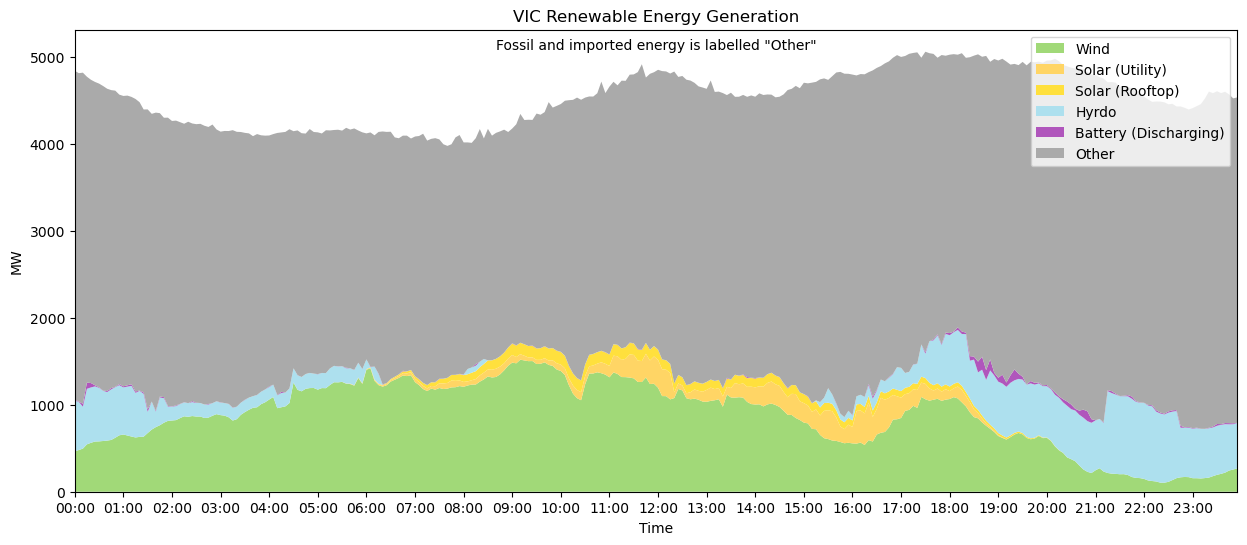

In [169]:
import matplotlib.ticker as ticker

plot_columns = ['au.nem.vic1.fuel_tech.other.power'] + renewable_fuel_tech_columns

df_plot_cols = df_pivot[plot_columns]

# Start the plot at midnight of the next day
day_one = start.replace(hour=0, minute=0, second=0, microsecond=0) + timedelta(days=1)
day_two = day_one + timedelta(days=1)

# Filter the DataFrame to include only rows where 'time' is within the last 24 hours
df_24_hours = df_plot_cols[(df_plot_cols.index >= day_one) & (df_plot_cols.index < day_two)]

default_color = '#000000'  # Black

fig, ax = plt.subplots(figsize=(15, 6))

# Create a list to hold the data for the stackplot
stackplot_data = []
stackplot_labels = []
stackplot_colors = []

# Loop through the columns in reverse order
for col in df_24_hours.columns[::-1]:
    # Get the code from the column name
    code = col.split('.')[-2]
    
    # Get the label and color from fueltech_dict, or use defaults if they are not available
    label = fueltech_dict.get(code, {'label': code})['label']
    color = fueltech_dict.get(code, {'color': default_color})['color']
    
    # Add the column data and color to the stackplot_data list
    stackplot_data.append(df_24_hours[col].values)
    stackplot_labels.append(label)
    stackplot_colors.append(color)

# Create the stackplot
ax.stackplot(df_24_hours.index, stackplot_data, labels=stackplot_labels, colors=stackplot_colors)

# Set the x-axis labels to show the time in 24-hour format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=df_24_hours.index.tz))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))

# Set the x-axis limits to the minimum and maximum values of the data
ax.set_xlim(df_24_hours.index.min(), df_24_hours.index.max())

ax.set_title('VIC Renewable Energy Generation')
ax.text(0.5, 0.95, 'Fossil and imported energy is labelled "Other"', 
        fontsize=10, ha='center', va='bottom', transform=ax.transAxes)
ax.set_xlabel('Time')
ax.set_ylabel('MW')

# Set the legend labels
ax.legend()